# Background

The autocorrelation function (ACF) reveals how the value of a quantity at a given
time/position correlates with its value at another time/position. Especially, for
the time autocorrelation $C_v(t)$ of a velocity $\vec v(t)$

$$C_v(t) = \frac{\sum_{i=0}^{N-1}\sum_{t_0} \vec v_i(t + t_0) \vec v_i(t_0)}{\sum_{i=0}^{N-1}\sum_{t_0} \vec v_i(t_0) \vec v_i(t_0)}= \left\langle \frac{ \vec v(t_0) \vec v (t_0 +t) }{ \vec v(t_0)\vec v(t_0) } \right\rangle$$

where the summation goes over all possible time origins $t_0$. In the case of velocity-velocity
autocorrelation (VACF), we generally average over all atoms $i$ as well.

**Note:** In homework, you will compute your own VACF, but simpler, where you will only look at $t_0=0$ and not do window averaging. The code is much simpler, but the statistics is worse. 

In [ ]:
import gsd, gsd.hoomd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def calculate_vacf(velocities, max_lag):

    n_frames, n_atoms, _ = velocities.shape
    vacf = np.zeros(max_lag)
    normalization = np.zeros(max_lag)

    for t_origin in range(n_frames - max_lag):
        v_t0 = velocities[t_origin]
        for lag in range(max_lag):
                v_t_plus_lag = velocities[t_origin + lag]
                # Sum dot products for all atoms at this lag and origin
                vacf[lag] += np.sum(np.sum(v_t0 * v_t_plus_lag, axis=1))
                normalization[lag] += np.sum(np.sum(v_t0 * v_t0, axis=1))

    # Normalize by the number of contributions at each lag
    vacf /= normalization

    return vacf



## Test with Random Numbers 

In [37]:
vel_random_test = np.random.uniform(size=(800,500,3))
v = calculate_vacf(vel_random_test, 500)

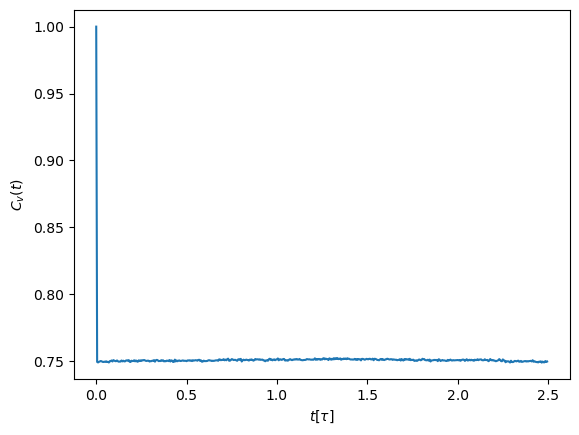

In [38]:
time = np.arange(0,500)*0.005

plt.plot(time,v)

plt.xlabel(r'$t [\tau]$')
plt.ylabel(r'$C_v(t)$')

plt.show()

## NVE

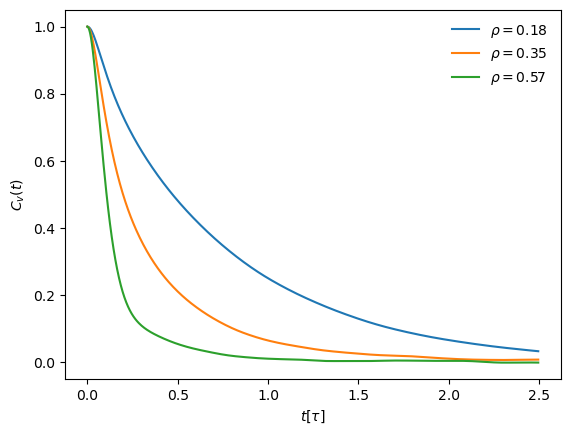

In [ ]:
vacfs = []
densities = [0.18,0.35,0.57]
for density in densities:
    trajectory = gsd.hoomd.open('run_liquid_nve_%s_1.50.gsd'%(density),mode='r')

    all_velocities = []
    for frame in trajectory[100:]:
        all_velocities.append(frame.particles.velocity)

    all_velocities = np.array(all_velocities)

    v = calculate_vacf(all_velocities, 500)
    vacfs.append(v)

time = np.arange(0,500)*0.005

for i,density in enumerate(densities):
    plt.plot(time,vacfs[i],label=r'$\rho=%s$'%density)

plt.xlabel(r'$t [\tau]$')
plt.ylabel(r'$C_v(t)$')
plt.legend(frameon=False)

plt.show()

# NVT (Impact of Thermostat) 

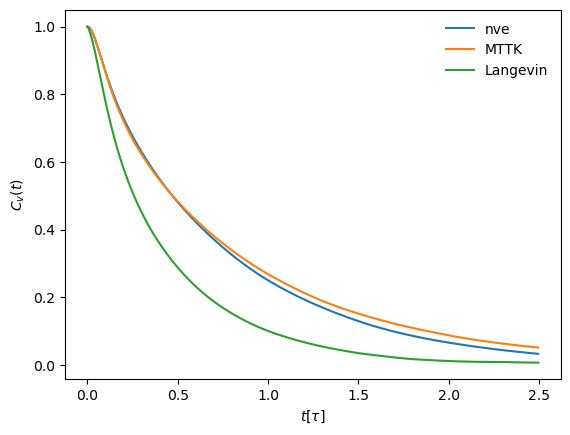

In [ ]:
vacfs = []
thermostats = ['nve','MTTK','Langevin']#,'Berendsen','Bussi']
for thermostat in thermostats:
    trajectory = gsd.hoomd.open('run_liquid_%s_0.18_1.50.gsd'%(thermostat),mode='r')

    all_velocities = []
    for frame in trajectory[100:]:
        all_velocities.append(frame.particles.velocity)

    all_velocities = np.array(all_velocities)

    v = calculate_vacf(all_velocities, 500)
    vacfs.append(v)

time = np.arange(0,500)*0.005

for i,thermostat in enumerate(thermostats):
    plt.plot(time,vacfs[i],label='%s'%thermostat)

plt.xlabel(r'$t [\tau]$')
plt.ylabel(r'$C_v(t)$')
plt.legend(frameon=False)

plt.show()